In [5]:
import pandas as pd

In [17]:
from matplotlib import pyplot as plt

In [18]:
#data = pd.read_csv('Asian Pants Stock - ASIANPAINT.BO (1).csv')
print(data)

            Date        Close
0     2010-01-04   178.964996
1     2010-01-05   179.039993
2     2010-01-06   178.039993
3     2010-01-07   177.649994
4     2010-01-08   179.570007
...          ...          ...
2714  2020-12-23  2642.750000
2715  2020-12-24  2649.350098
2716  2020-12-28  2683.649902
2717  2020-12-29  2696.350098
2718  2020-12-30  2733.550049

[2719 rows x 2 columns]


In [19]:
#type(data) 

pandas.core.frame.DataFrame

In [33]:
#plt.plot(data.Date, data.Close)
#plt.legend(['Year', 'Close'])
#plt.xlabel('Year')
#plt.ylabel('Close')
#plt.show()

In [25]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web

In [86]:
style.use('ggplot')

start = dt.datetime(2010,1,1)
end = dt.datetime(2020,12,31)

df = web.DataReader('ASIANPAINT.BO', 'yahoo', start, end)
df.to_csv('ASIANPAINT.BO.csv')
#df = pd.read_csv('ASIANPAINT.BO.csv', parse_dates=True, index_col=0)
print(df)

                   High          Low         Open        Close    Volume  \
Date                                                                       
2010-01-04   179.990005   173.800003   173.800003   178.964996   26700.0   
2010-01-05   179.919998   178.500000   179.100006   179.039993   30190.0   
2010-01-06   180.679993   177.604996   180.679993   178.039993   18160.0   
2010-01-07   179.500000   177.024994   178.000000   177.649994  280410.0   
2010-01-08   182.899994   173.000000   173.000000   179.570007  149190.0   
...                 ...          ...          ...          ...       ...   
2020-12-24  2656.250000  2613.100098  2646.250000  2649.350098   62540.0   
2020-12-28  2688.000000  2629.600098  2649.350098  2683.649902   50949.0   
2020-12-29  2712.500000  2673.800049  2685.100098  2696.350098   42410.0   
2020-12-30  2740.899902  2680.449951  2698.699951  2733.550049   44155.0   
2020-12-31  2771.500000  2725.600098  2736.800049  2764.449951   33405.0   

           

In [81]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-24,2656.250000,2613.100098,2646.250000,2649.350098,62540.0,2649.350098
2020-12-28,2688.000000,2629.600098,2649.350098,2683.649902,50949.0,2683.649902
2020-12-29,2712.500000,2673.800049,2685.100098,2696.350098,42410.0,2696.350098
2020-12-30,2740.899902,2680.449951,2698.699951,2733.550049,44155.0,2733.550049
2020-12-31,2771.500000,2725.600098,2736.800049,2764.449951,33405.0,2764.449951


In [89]:
df2 = df.reset_index()['Close']
print(df2)

0        178.964996
1        179.039993
2        178.039993
3        177.649994
4        179.570007
           ...     
2706    2649.350098
2707    2683.649902
2708    2696.350098
2709    2733.550049
2710    2764.449951
Name: Close, Length: 2711, dtype: float64


In [87]:
df2.tail()

2706    2649.350098
2707    2683.649902
2708    2696.350098
2709    2733.550049
2710    2764.449951
Name: Close, dtype: float64

In [90]:
df2.shape

(2711,)

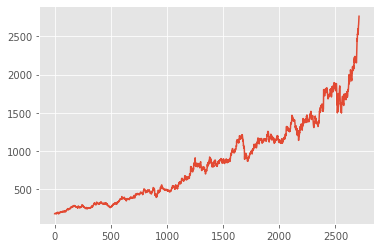

In [91]:
plt.plot(df2)

In [128]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df2 = scaler.fit_transform(np.array(df2).reshape(-1,1))

In [129]:
df2

array([[1.09337615e-03],
       [1.12235135e-03],
       [7.35999603e-04],
       ...,
       [9.73689503e-01],
       [9.88061769e-01],
       [1.00000000e+00]])

In [130]:
print(df2)

[[1.09337615e-03]
 [1.12235135e-03]
 [7.35999603e-04]
 ...
 [9.73689503e-01]
 [9.88061769e-01]
 [1.00000000e+00]]


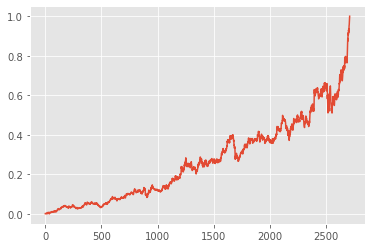

In [131]:
plt.plot(df2)

In [140]:
#Spliting dataset into train and test split
training_size=int(len(df2)*0.60)
test_size=len(df2)-training_size
train_data,test_data=df2[0:training_size],df2[training_size:len(df2)]

In [143]:
training_size, test_size

(1626, 1085)

In [144]:
train_data

array([[0.00109338],
       [0.00112235],
       [0.000736  ],
       ...,
       [0.36586157],
       [0.37370453],
       [0.36725243]])

In [145]:
test_data

array([[0.37353065],
       [0.37586809],
       [0.37467041],
       ...,
       [0.9736895 ],
       [0.98806177],
       [1.        ]])

In [146]:
import numpy
#COnvert an array of values into dataset matrix 
def create_dataset(dataset,time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]    #i = 0, 0,1,2,3
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)
 

In [147]:
#Reshape into X = t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

In [153]:
print(time_step)

100


In [154]:
print(X_train)

[[0.00109338 0.00112235 0.000736   ... 0.01343345 0.01322869 0.01256802]
 [0.00112235 0.000736   0.00058532 ... 0.01322869 0.01256802 0.0119769 ]
 [0.000736   0.00058532 0.00132712 ... 0.01256802 0.0119769  0.01229951]
 ...
 [0.2719781  0.26695553 0.26919639 ... 0.34217824 0.36734902 0.36261621]
 [0.26695553 0.26919639 0.27078042 ... 0.36734902 0.36261621 0.36479911]
 [0.26919639 0.27078042 0.27702001 ... 0.36261621 0.36479911 0.36586157]]


In [155]:
print(Y_train)

[0.0119769  0.01229951 0.01352811 ... 0.36479911 0.36586157 0.37370453]


In [156]:
print(X_train.shape), print(Y_train.shape)

(1525, 100)
(1525,)


(None, None)

In [161]:
X_test

array([[[0.37353065],
        [0.37586809],
        [0.37467041],
        ...,
        [0.27244173],
        [0.27632456],
        [0.28103805]],

       [[0.37586809],
        [0.37467041],
        [0.36864333],
        ...,
        [0.27632456],
        [0.28103805],
        [0.27910629]],

       [[0.37467041],
        [0.36864333],
        [0.37411017],
        ...,
        [0.28103805],
        [0.27910629],
        [0.28204258]],

       ...,

       [[0.59427275],
        [0.59537385],
        [0.59966234],
        ...,
        [0.93826097],
        [0.95298101],
        [0.95553097]],

       [[0.59537385],
        [0.59966234],
        [0.62933417],
        ...,
        [0.95298101],
        [0.95553097],
        [0.96878276]],

       [[0.59966234],
        [0.62933417],
        [0.62060259],
        ...,
        [0.95553097],
        [0.96878276],
        [0.9736895 ]]])

In [157]:
print(X_test), print(Y_test)

[[0.37353065 0.37586809 0.37467041 ... 0.27244173 0.27632456 0.28103805]
 [0.37586809 0.37467041 0.36864333 ... 0.27632456 0.28103805 0.27910629]
 [0.37467041 0.36864333 0.37411017 ... 0.28103805 0.27910629 0.28204258]
 ...
 [0.59427275 0.59537385 0.59966234 ... 0.93826097 0.95298101 0.95553097]
 [0.59537385 0.59966234 0.62933417 ... 0.95298101 0.95553097 0.96878276]
 [0.59966234 0.62933417 0.62060259 ... 0.95553097 0.96878276 0.9736895 ]]
[0.27910629 0.28204258 0.286022   0.29036846 0.28364593 0.28907416
 0.29284109 0.29231953 0.29235815 0.29309223 0.30290557 0.30329193
 0.30286693 0.30508845 0.30448961 0.30819857 0.30949287 0.3063634
 0.30727134 0.30702021 0.31457338 0.31409044 0.31264162 0.31515291
 0.31706535 0.31743239 0.3192096  0.31548132 0.31223596 0.31069055
 0.31109621 0.30661454 0.30321465 0.30879744 0.31488248 0.32604803
 0.32170157 0.31890052 0.32774796 0.33020134 0.32923546 0.32390378
 0.32863659 0.32712981 0.3268787  0.33031721 0.32985361 0.34499858
 0.34298957 0.3521460

(None, None)

In [158]:
print(X_test.shape), print(Y_test.shape)

(984, 100)
(984,)


(None, None)

In [159]:
#Reshape input to be [sample,time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [165]:
# Create the stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


In [184]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [185]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [186]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100,batch_size=64,verbose=1)

Train on 1525 samples, validate on 984 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/100
1525/1525 [==============================] - 18s 12ms/sample - loss: 0.0069 - val_loss: 0.0013
Epoch 2/100
1525/1525 [==============================] - 9s 6ms/sample - loss: 3.7740e-04 - val_loss: 0.0019
Epoch 3/100
1525/1525 [==============================] - 8s 6ms/sample - loss: 1.3502e-04 - val_loss: 7.9234e-04
Epoch 4/100
1525/1525 [==============================] - 9s 6ms/sample - loss: 9.7342e-05 - val_loss: 7.9815e-04
Epoch 5/100
1525/1525 [==============================] - 9s 6ms/sample - loss: 9.4943e-05 - val_loss: 7.8064e-04
Epoch 6/100
1525/1525 [==============================] - 8s 5ms/sample - loss: 9.1745e-05 - val_loss: 8.1193e-04
Epoch 7/100
1525/1525 [==============================] - 9s 6ms/sample - loss: 9.1081e-05 - val_loss: 8.7363e-04
Epoch 8/100
1525/1525 [==============================] - 8s 6ms/sample - loss:

Epoch 70/100
1525/1525 [==============================] - 8s 6ms/sample - loss: 4.7144e-05 - val_loss: 3.7831e-04
Epoch 71/100
1525/1525 [==============================] - 8s 5ms/sample - loss: 4.6741e-05 - val_loss: 3.7205e-04
Epoch 72/100
1525/1525 [==============================] - 8s 6ms/sample - loss: 3.9798e-05 - val_loss: 3.8052e-04
Epoch 73/100
1525/1525 [==============================] - 8s 6ms/sample - loss: 4.0234e-05 - val_loss: 3.8707e-04
Epoch 74/100
1525/1525 [==============================] - 8s 6ms/sample - loss: 4.1177e-05 - val_loss: 3.6292e-04
Epoch 75/100
1525/1525 [==============================] - 9s 6ms/sample - loss: 4.3338e-05 - val_loss: 3.5443e-04
Epoch 76/100
1525/1525 [==============================] - 8s 6ms/sample - loss: 4.2743e-05 - val_loss: 3.7829e-04
Epoch 77/100
1525/1525 [==============================] - 8s 6ms/sample - loss: 4.4998e-05 - val_loss: 2.8468e-04
Epoch 78/100
1525/1525 [==============================] - 8s 5ms/sample - loss: 4.0434e-

In [187]:
#Prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test) 

In [188]:
# Transform back to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [191]:
#Calculate RSME performance metrices
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train,train_predict))

0.005632228470554653

In [193]:
math.sqrt(mean_squared_error(Y_test,test_predict))

0.015452146815563153

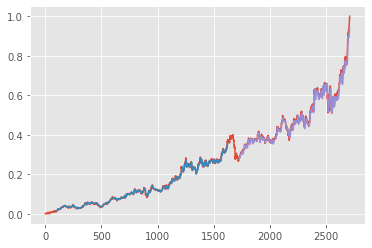

In [194]:
#Python
#Shift train prediction for plotting
look_back=100
trainPredictPlot=numpy.empty_like(df2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
#Shift predictions for plotting
testPredictPlot = numpy.empty_like(df2)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df2)-1, :] = test_predict
#plot baseline and predictions
plt.plot(scaler.inverse_transform(df2))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [195]:
len(test_data)

1085

In [200]:
x_input=test_data[985:].reshape(1,-1)
x_input.shape

(1, 100)

In [202]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [203]:
temp_input

[0.6206025864544417,
 0.6233457215732829,
 0.6261274352721258,
 0.628213744127297,
 0.6280012318027406,
 0.6412337790674406,
 0.6558185574394823,
 0.660493404121019,
 0.6564560472510732,
 0.6885618678243968,
 0.6904550008070907,
 0.7050397791791322,
 0.6934685632825689,
 0.697699096024992,
 0.6883107297577605,
 0.6673318583039649,
 0.6962309405293328,
 0.6837904332066213,
 0.6963275284655714,
 0.6876539506561687,
 0.6976797595729131,
 0.688484616340237,
 0.6964627893059682,
 0.7289549144621683,
 0.7182529899917531,
 0.7168428438523309,
 0.7112020706463291,
 0.7102748641881003,
 0.707898791524213,
 0.7157803765537054,
 0.6941060059320817,
 0.6798496642729142,
 0.6839836090790987,
 0.6734361875770029,
 0.6754452449480145,
 0.6838290589487012,
 0.6891413954418288,
 0.6998433670743222,
 0.720474512525243,
 0.7151235502900354,
 0.7396569332567399,
 0.7448146724573917,
 0.7396569332567399,
 0.7241255176502339,
 0.7343638388915347,
 0.7296697029199971,
 0.732200325714282,
 0.739193235703469,


In [212]:
#Prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<365):
    
    if(len(temp_input)>100):
        #Print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape((1, n_steps, 1))
        #Print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #Print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
        
print(lst_output)

0 day input [0.69410601 0.67984966 0.68398361 0.67343619 0.67544524 0.68382906
 0.6891414  0.69984337 0.72047451 0.71512355 0.73965693 0.74481467
 0.73965693 0.72412552 0.73436384 0.7296697  0.73220033 0.73919324
 0.72851065 0.7319299  0.75074521 0.74883279 0.74338519 0.75078379
 0.73583199 0.78120899 0.76616061 0.79150532 0.78696569 0.77112526
 0.76451861 0.77004346 0.79677898 0.78518843 0.79156323 0.78178852
 0.77493077 0.77099    0.7740229  0.77688187 0.78037837 0.76695265
 0.7679572  0.77782841 0.78486009 0.76426752 0.7649243  0.78862702
 0.7933984  0.8268565  0.86338608 0.87416526 0.88743648 0.87420393
 0.9060006  0.90911075 0.90563359 0.91691504 0.90831871 0.92947147
 0.92641933 0.93706334 0.91896272 0.93826097 0.95298101 0.95553097
 0.96878276 0.9736895  0.98806177 1.         0.96637756 0.96668798
 0.95852089 0.94543725 0.92941642 0.91143459 0.8920697  0.87180781
 0.85114062 0.83057529 0.81061482 0.79173505 0.77436388 0.75886071
 0.74550122 0.73446369 0.72582322 0.71955311 0.715

9 day output [[0.6767624]]
10 day input [0.73965693 0.74481467 0.73965693 0.72412552 0.73436384 0.7296697
 0.73220033 0.73919324 0.72851065 0.7319299  0.75074521 0.74883279
 0.74338519 0.75078379 0.73583199 0.78120899 0.76616061 0.79150532
 0.78696569 0.77112526 0.76451861 0.77004346 0.79677898 0.78518843
 0.79156323 0.78178852 0.77493077 0.77099    0.7740229  0.77688187
 0.78037837 0.76695265 0.7679572  0.77782841 0.78486009 0.76426752
 0.7649243  0.78862702 0.7933984  0.8268565  0.86338608 0.87416526
 0.88743648 0.87420393 0.9060006  0.90911075 0.90563359 0.91691504
 0.90831871 0.92947147 0.92641933 0.93706334 0.91896272 0.93826097
 0.95298101 0.95553097 0.96878276 0.9736895  0.98806177 1.
 0.96637756 0.96668798 0.95852089 0.94543725 0.92941642 0.91143459
 0.8920697  0.87180781 0.85114062 0.83057529 0.81061482 0.79173505
 0.77436388 0.75886071 0.74550122 0.73446369 0.72582322 0.71955311
 0.71553057 0.71354997 0.71333647 0.71456379 0.71687144 0.71988291
 0.72322106 0.72652507 0.729463

18 day output [[0.6176581]]
19 day input [0.7319299  0.75074521 0.74883279 0.74338519 0.75078379 0.73583199
 0.78120899 0.76616061 0.79150532 0.78696569 0.77112526 0.76451861
 0.77004346 0.79677898 0.78518843 0.79156323 0.78178852 0.77493077
 0.77099    0.7740229  0.77688187 0.78037837 0.76695265 0.7679572
 0.77782841 0.78486009 0.76426752 0.7649243  0.78862702 0.7933984
 0.8268565  0.86338608 0.87416526 0.88743648 0.87420393 0.9060006
 0.90911075 0.90563359 0.91691504 0.90831871 0.92947147 0.92641933
 0.93706334 0.91896272 0.93826097 0.95298101 0.95553097 0.96878276
 0.9736895  0.98806177 1.         0.96637756 0.96668798 0.95852089
 0.94543725 0.92941642 0.91143459 0.8920697  0.87180781 0.85114062
 0.83057529 0.81061482 0.79173505 0.77436388 0.75886071 0.74550122
 0.73446369 0.72582322 0.71955311 0.71553057 0.71354997 0.71333647
 0.71456379 0.71687144 0.71988291 0.72322106 0.72652507 0.72946358
 0.73174644 0.73313409 0.73344415 0.73255324 0.73039883 0.72697645
 0.72233546 0.71657342 0

26 day output [[0.60804945]]
27 day input [0.79150532 0.78696569 0.77112526 0.76451861 0.77004346 0.79677898
 0.78518843 0.79156323 0.78178852 0.77493077 0.77099    0.7740229
 0.77688187 0.78037837 0.76695265 0.7679572  0.77782841 0.78486009
 0.76426752 0.7649243  0.78862702 0.7933984  0.8268565  0.86338608
 0.87416526 0.88743648 0.87420393 0.9060006  0.90911075 0.90563359
 0.91691504 0.90831871 0.92947147 0.92641933 0.93706334 0.91896272
 0.93826097 0.95298101 0.95553097 0.96878276 0.9736895  0.98806177
 1.         0.96637756 0.96668798 0.95852089 0.94543725 0.92941642
 0.91143459 0.8920697  0.87180781 0.85114062 0.83057529 0.81061482
 0.79173505 0.77436388 0.75886071 0.74550122 0.73446369 0.72582322
 0.71955311 0.71553057 0.71354997 0.71333647 0.71456379 0.71687144
 0.71988291 0.72322106 0.72652507 0.72946358 0.73174644 0.73313409
 0.73344415 0.73255324 0.73039883 0.72697645 0.72233546 0.71657342
 0.70982903 0.70227313 0.69410193 0.68552589 0.6767624  0.66802418
 0.65951318 0.6514107

37 day output [[0.5857208]]
38 day input [0.7740229  0.77688187 0.78037837 0.76695265 0.7679572  0.77782841
 0.78486009 0.76426752 0.7649243  0.78862702 0.7933984  0.8268565
 0.86338608 0.87416526 0.88743648 0.87420393 0.9060006  0.90911075
 0.90563359 0.91691504 0.90831871 0.92947147 0.92641933 0.93706334
 0.91896272 0.93826097 0.95298101 0.95553097 0.96878276 0.9736895
 0.98806177 1.         0.96637756 0.96668798 0.95852089 0.94543725
 0.92941642 0.91143459 0.8920697  0.87180781 0.85114062 0.83057529
 0.81061482 0.79173505 0.77436388 0.75886071 0.74550122 0.73446369
 0.72582322 0.71955311 0.71553057 0.71354997 0.71333647 0.71456379
 0.71687144 0.71988291 0.72322106 0.72652507 0.72946358 0.73174644
 0.73313409 0.73344415 0.73255324 0.73039883 0.72697645 0.72233546
 0.71657342 0.70982903 0.70227313 0.69410193 0.68552589 0.6767624
 0.66802418 0.65951318 0.6514107  0.64387149 0.6370182  0.63093793
 0.62568104 0.62126142 0.61765808 0.61482048 0.6126709  0.61111176
 0.61003089 0.60930693 0

45 day output [[0.5562537]]
46 day input [0.7649243  0.78862702 0.7933984  0.8268565  0.86338608 0.87416526
 0.88743648 0.87420393 0.9060006  0.90911075 0.90563359 0.91691504
 0.90831871 0.92947147 0.92641933 0.93706334 0.91896272 0.93826097
 0.95298101 0.95553097 0.96878276 0.9736895  0.98806177 1.
 0.96637756 0.96668798 0.95852089 0.94543725 0.92941642 0.91143459
 0.8920697  0.87180781 0.85114062 0.83057529 0.81061482 0.79173505
 0.77436388 0.75886071 0.74550122 0.73446369 0.72582322 0.71955311
 0.71553057 0.71354997 0.71333647 0.71456379 0.71687144 0.71988291
 0.72322106 0.72652507 0.72946358 0.73174644 0.73313409 0.73344415
 0.73255324 0.73039883 0.72697645 0.72233546 0.71657342 0.70982903
 0.70227313 0.69410193 0.68552589 0.6767624  0.66802418 0.65951318
 0.6514107  0.64387149 0.6370182  0.63093793 0.62568104 0.62126142
 0.61765808 0.61482048 0.6126709  0.61111176 0.61003089 0.60930693
 0.60881567 0.60843486 0.60804945 0.60755527 0.60686255 0.6058985
 0.6046083  0.60295671 0.60092

53 day output [[0.53814536]]
54 day input [0.9060006  0.90911075 0.90563359 0.91691504 0.90831871 0.92947147
 0.92641933 0.93706334 0.91896272 0.93826097 0.95298101 0.95553097
 0.96878276 0.9736895  0.98806177 1.         0.96637756 0.96668798
 0.95852089 0.94543725 0.92941642 0.91143459 0.8920697  0.87180781
 0.85114062 0.83057529 0.81061482 0.79173505 0.77436388 0.75886071
 0.74550122 0.73446369 0.72582322 0.71955311 0.71553057 0.71354997
 0.71333647 0.71456379 0.71687144 0.71988291 0.72322106 0.72652507
 0.72946358 0.73174644 0.73313409 0.73344415 0.73255324 0.73039883
 0.72697645 0.72233546 0.71657342 0.70982903 0.70227313 0.69410193
 0.68552589 0.6767624  0.66802418 0.65951318 0.6514107  0.64387149
 0.6370182  0.63093793 0.62568104 0.62126142 0.61765808 0.61482048
 0.6126709  0.61111176 0.61003089 0.60930693 0.60881567 0.60843486
 0.60804945 0.60755527 0.60686255 0.6058985  0.6046083  0.60295671
 0.60092729 0.59852219 0.59575981 0.59267348 0.58930892 0.58572078
 0.58197004 0.578120

64 day output [[0.52106607]]
65 day input [0.95553097 0.96878276 0.9736895  0.98806177 1.         0.96637756
 0.96668798 0.95852089 0.94543725 0.92941642 0.91143459 0.8920697
 0.87180781 0.85114062 0.83057529 0.81061482 0.79173505 0.77436388
 0.75886071 0.74550122 0.73446369 0.72582322 0.71955311 0.71553057
 0.71354997 0.71333647 0.71456379 0.71687144 0.71988291 0.72322106
 0.72652507 0.72946358 0.73174644 0.73313409 0.73344415 0.73255324
 0.73039883 0.72697645 0.72233546 0.71657342 0.70982903 0.70227313
 0.69410193 0.68552589 0.6767624  0.66802418 0.65951318 0.6514107
 0.64387149 0.6370182  0.63093793 0.62568104 0.62126142 0.61765808
 0.61482048 0.6126709  0.61111176 0.61003089 0.60930693 0.60881567
 0.60843486 0.60804945 0.60755527 0.60686255 0.6058985  0.6046083
 0.60295671 0.60092729 0.59852219 0.59575981 0.59267348 0.58930892
 0.58572078 0.58197004 0.57812077 0.57423753 0.57038194 0.56661063
 0.5629732  0.55951041 0.55625367 0.55322355 0.55043066 0.54787618
 0.54555166 0.54344094 

72 day output [[0.50472856]]
73 day input [0.94543725 0.92941642 0.91143459 0.8920697  0.87180781 0.85114062
 0.83057529 0.81061482 0.79173505 0.77436388 0.75886071 0.74550122
 0.73446369 0.72582322 0.71955311 0.71553057 0.71354997 0.71333647
 0.71456379 0.71687144 0.71988291 0.72322106 0.72652507 0.72946358
 0.73174644 0.73313409 0.73344415 0.73255324 0.73039883 0.72697645
 0.72233546 0.71657342 0.70982903 0.70227313 0.69410193 0.68552589
 0.6767624  0.66802418 0.65951318 0.6514107  0.64387149 0.6370182
 0.63093793 0.62568104 0.62126142 0.61765808 0.61482048 0.6126709
 0.61111176 0.61003089 0.60930693 0.60881567 0.60843486 0.60804945
 0.60755527 0.60686255 0.6058985  0.6046083  0.60295671 0.60092729
 0.59852219 0.59575981 0.59267348 0.58930892 0.58572078 0.58197004
 0.57812077 0.57423753 0.57038194 0.56661063 0.5629732  0.55951041
 0.55625367 0.55322355 0.55043066 0.54787618 0.54555166 0.54344094
 0.54152191 0.53976697 0.53814536 0.53662461 0.53517222 0.53375626
 0.53234762 0.53092027

80 day output [[0.48980778]]
81 day input [0.79173505 0.77436388 0.75886071 0.74550122 0.73446369 0.72582322
 0.71955311 0.71553057 0.71354997 0.71333647 0.71456379 0.71687144
 0.71988291 0.72322106 0.72652507 0.72946358 0.73174644 0.73313409
 0.73344415 0.73255324 0.73039883 0.72697645 0.72233546 0.71657342
 0.70982903 0.70227313 0.69410193 0.68552589 0.6767624  0.66802418
 0.65951318 0.6514107  0.64387149 0.6370182  0.63093793 0.62568104
 0.62126142 0.61765808 0.61482048 0.6126709  0.61111176 0.61003089
 0.60930693 0.60881567 0.60843486 0.60804945 0.60755527 0.60686255
 0.6058985  0.6046083  0.60295671 0.60092729 0.59852219 0.59575981
 0.59267348 0.58930892 0.58572078 0.58197004 0.57812077 0.57423753
 0.57038194 0.56661063 0.5629732  0.55951041 0.55625367 0.55322355
 0.55043066 0.54787618 0.54555166 0.54344094 0.54152191 0.53976697
 0.53814536 0.53662461 0.53517222 0.53375626 0.53234762 0.53092027
 0.52945232 0.52792639 0.52632993 0.52465564 0.5229004  0.52106607
 0.51915818 0.517185

88 day output [[0.4779516]]
89 day input [0.71354997 0.71333647 0.71456379 0.71687144 0.71988291 0.72322106
 0.72652507 0.72946358 0.73174644 0.73313409 0.73344415 0.73255324
 0.73039883 0.72697645 0.72233546 0.71657342 0.70982903 0.70227313
 0.69410193 0.68552589 0.6767624  0.66802418 0.65951318 0.6514107
 0.64387149 0.6370182  0.63093793 0.62568104 0.62126142 0.61765808
 0.61482048 0.6126709  0.61111176 0.61003089 0.60930693 0.60881567
 0.60843486 0.60804945 0.60755527 0.60686255 0.6058985  0.6046083
 0.60295671 0.60092729 0.59852219 0.59575981 0.59267348 0.58930892
 0.58572078 0.58197004 0.57812077 0.57423753 0.57038194 0.56661063
 0.5629732  0.55951041 0.55625367 0.55322355 0.55043066 0.54787618
 0.54555166 0.54344094 0.54152191 0.53976697 0.53814536 0.53662461
 0.53517222 0.53375626 0.53234762 0.53092027 0.52945232 0.52792639
 0.52632993 0.52465564 0.5229004  0.52106607 0.51915818 0.51718569
 0.51515996 0.51309454 0.51100403 0.50890326 0.50680685 0.50472856
 0.50268084 0.50067395 

96 day output [[0.46664828]]
97 day input [0.73174644 0.73313409 0.73344415 0.73255324 0.73039883 0.72697645
 0.72233546 0.71657342 0.70982903 0.70227313 0.69410193 0.68552589
 0.6767624  0.66802418 0.65951318 0.6514107  0.64387149 0.6370182
 0.63093793 0.62568104 0.62126142 0.61765808 0.61482048 0.6126709
 0.61111176 0.61003089 0.60930693 0.60881567 0.60843486 0.60804945
 0.60755527 0.60686255 0.6058985  0.6046083  0.60295671 0.60092729
 0.59852219 0.59575981 0.59267348 0.58930892 0.58572078 0.58197004
 0.57812077 0.57423753 0.57038194 0.56661063 0.5629732  0.55951041
 0.55625367 0.55322355 0.55043066 0.54787618 0.54555166 0.54344094
 0.54152191 0.53976697 0.53814536 0.53662461 0.53517222 0.53375626
 0.53234762 0.53092027 0.52945232 0.52792639 0.52632993 0.52465564
 0.5229004  0.52106607 0.51915818 0.51718569 0.51515996 0.51309454
 0.51100403 0.50890326 0.50680685 0.50472856 0.50268084 0.50067395
 0.49871653 0.49681461 0.49497223 0.49319088 0.49147019 0.48980778
 0.48819971 0.48664069

104 day output [[0.45522952]]
105 day input [0.70982903 0.70227313 0.69410193 0.68552589 0.6767624  0.66802418
 0.65951318 0.6514107  0.64387149 0.6370182  0.63093793 0.62568104
 0.62126142 0.61765808 0.61482048 0.6126709  0.61111176 0.61003089
 0.60930693 0.60881567 0.60843486 0.60804945 0.60755527 0.60686255
 0.6058985  0.6046083  0.60295671 0.60092729 0.59852219 0.59575981
 0.59267348 0.58930892 0.58572078 0.58197004 0.57812077 0.57423753
 0.57038194 0.56661063 0.5629732  0.55951041 0.55625367 0.55322355
 0.55043066 0.54787618 0.54555166 0.54344094 0.54152191 0.53976697
 0.53814536 0.53662461 0.53517222 0.53375626 0.53234762 0.53092027
 0.52945232 0.52792639 0.52632993 0.52465564 0.5229004  0.52106607
 0.51915818 0.51718569 0.51515996 0.51309454 0.51100403 0.50890326
 0.50680685 0.50472856 0.50268084 0.50067395 0.49871653 0.49681461
 0.49497223 0.49319088 0.49147019 0.48980778 0.48819971 0.48664069
 0.48512483 0.48364505 0.48219469 0.48076656 0.47935417 0.47795159
 0.47655344 0.4751

114 day output [[0.442163]]
115 day input [0.63093793 0.62568104 0.62126142 0.61765808 0.61482048 0.6126709
 0.61111176 0.61003089 0.60930693 0.60881567 0.60843486 0.60804945
 0.60755527 0.60686255 0.6058985  0.6046083  0.60295671 0.60092729
 0.59852219 0.59575981 0.59267348 0.58930892 0.58572078 0.58197004
 0.57812077 0.57423753 0.57038194 0.56661063 0.5629732  0.55951041
 0.55625367 0.55322355 0.55043066 0.54787618 0.54555166 0.54344094
 0.54152191 0.53976697 0.53814536 0.53662461 0.53517222 0.53375626
 0.53234762 0.53092027 0.52945232 0.52792639 0.52632993 0.52465564
 0.5229004  0.52106607 0.51915818 0.51718569 0.51515996 0.51309454
 0.51100403 0.50890326 0.50680685 0.50472856 0.50268084 0.50067395
 0.49871653 0.49681461 0.49497223 0.49319088 0.49147019 0.48980778
 0.48819971 0.48664069 0.48512483 0.48364505 0.48219469 0.48076656
 0.47935417 0.47795159 0.47655344 0.47515544 0.47375414 0.47234717
 0.47093305 0.46951154 0.4680829  0.46664828 0.46520963 0.46376899
 0.46232879 0.4608919

123 day output [[0.43149546]]
124 day input [0.60881567 0.60843486 0.60804945 0.60755527 0.60686255 0.6058985
 0.6046083  0.60295671 0.60092729 0.59852219 0.59575981 0.59267348
 0.58930892 0.58572078 0.58197004 0.57812077 0.57423753 0.57038194
 0.56661063 0.5629732  0.55951041 0.55625367 0.55322355 0.55043066
 0.54787618 0.54555166 0.54344094 0.54152191 0.53976697 0.53814536
 0.53662461 0.53517222 0.53375626 0.53234762 0.53092027 0.52945232
 0.52792639 0.52632993 0.52465564 0.5229004  0.52106607 0.51915818
 0.51718569 0.51515996 0.51309454 0.51100403 0.50890326 0.50680685
 0.50472856 0.50268084 0.50067395 0.49871653 0.49681461 0.49497223
 0.49319088 0.49147019 0.48980778 0.48819971 0.48664069 0.48512483
 0.48364505 0.48219469 0.48076656 0.47935417 0.47795159 0.47655344
 0.47515544 0.47375414 0.47234717 0.47093305 0.46951154 0.4680829
 0.46664828 0.46520963 0.46376899 0.46232879 0.46089196 0.45946109
 0.45803881 0.45662758 0.45522952 0.45384631 0.4524793  0.45112962
 0.44979766 0.448483

132 day output [[0.4213045]]
133 day input [0.59852219 0.59575981 0.59267348 0.58930892 0.58572078 0.58197004
 0.57812077 0.57423753 0.57038194 0.56661063 0.5629732  0.55951041
 0.55625367 0.55322355 0.55043066 0.54787618 0.54555166 0.54344094
 0.54152191 0.53976697 0.53814536 0.53662461 0.53517222 0.53375626
 0.53234762 0.53092027 0.52945232 0.52792639 0.52632993 0.52465564
 0.5229004  0.52106607 0.51915818 0.51718569 0.51515996 0.51309454
 0.51100403 0.50890326 0.50680685 0.50472856 0.50268084 0.50067395
 0.49871653 0.49681461 0.49497223 0.49319088 0.49147019 0.48980778
 0.48819971 0.48664069 0.48512483 0.48364505 0.48219469 0.48076656
 0.47935417 0.47795159 0.47655344 0.47515544 0.47375414 0.47234717
 0.47093305 0.46951154 0.4680829  0.46664828 0.46520963 0.46376899
 0.46232879 0.46089196 0.45946109 0.45803881 0.45662758 0.45522952
 0.45384631 0.4524793  0.45112962 0.44979766 0.44848356 0.4471871
 0.44590774 0.4446446  0.44339675 0.44216299 0.44094187 0.43973243
 0.43853319 0.437342

142 day output [[0.4106261]]
143 day input [0.5629732  0.55951041 0.55625367 0.55322355 0.55043066 0.54787618
 0.54555166 0.54344094 0.54152191 0.53976697 0.53814536 0.53662461
 0.53517222 0.53375626 0.53234762 0.53092027 0.52945232 0.52792639
 0.52632993 0.52465564 0.5229004  0.52106607 0.51915818 0.51718569
 0.51515996 0.51309454 0.51100403 0.50890326 0.50680685 0.50472856
 0.50268084 0.50067395 0.49871653 0.49681461 0.49497223 0.49319088
 0.49147019 0.48980778 0.48819971 0.48664069 0.48512483 0.48364505
 0.48219469 0.48076656 0.47935417 0.47795159 0.47655344 0.47515544
 0.47375414 0.47234717 0.47093305 0.46951154 0.4680829  0.46664828
 0.46520963 0.46376899 0.46232879 0.46089196 0.45946109 0.45803881
 0.45662758 0.45522952 0.45384631 0.4524793  0.45112962 0.44979766
 0.44848356 0.4471871  0.44590774 0.4446446  0.44339675 0.44216299
 0.44094187 0.43973243 0.43853319 0.43734294 0.43616074 0.43498552
 0.4338167  0.4326534  0.43149546 0.43034238 0.42919403 0.42805061
 0.42691228 0.42577

152 day output [[0.4006701]]
153 day input [0.53814536 0.53662461 0.53517222 0.53375626 0.53234762 0.53092027
 0.52945232 0.52792639 0.52632993 0.52465564 0.5229004  0.52106607
 0.51915818 0.51718569 0.51515996 0.51309454 0.51100403 0.50890326
 0.50680685 0.50472856 0.50268084 0.50067395 0.49871653 0.49681461
 0.49497223 0.49319088 0.49147019 0.48980778 0.48819971 0.48664069
 0.48512483 0.48364505 0.48219469 0.48076656 0.47935417 0.47795159
 0.47655344 0.47515544 0.47375414 0.47234717 0.47093305 0.46951154
 0.4680829  0.46664828 0.46520963 0.46376899 0.46232879 0.46089196
 0.45946109 0.45803881 0.45662758 0.45522952 0.45384631 0.4524793
 0.45112962 0.44979766 0.44848356 0.4471871  0.44590774 0.4446446
 0.44339675 0.44216299 0.44094187 0.43973243 0.43853319 0.43734294
 0.43616074 0.43498552 0.4338167  0.4326534  0.43149546 0.43034238
 0.42919403 0.42805061 0.42691228 0.42577899 0.42465118 0.42352933
 0.42241371 0.42130449 0.42020234 0.41910741 0.41801989 0.41694006
 0.41586807 0.4148039

162 day output [[0.39127368]]
163 day input [0.5229004  0.52106607 0.51915818 0.51718569 0.51515996 0.51309454
 0.51100403 0.50890326 0.50680685 0.50472856 0.50268084 0.50067395
 0.49871653 0.49681461 0.49497223 0.49319088 0.49147019 0.48980778
 0.48819971 0.48664069 0.48512483 0.48364505 0.48219469 0.48076656
 0.47935417 0.47795159 0.47655344 0.47515544 0.47375414 0.47234717
 0.47093305 0.46951154 0.4680829  0.46664828 0.46520963 0.46376899
 0.46232879 0.46089196 0.45946109 0.45803881 0.45662758 0.45522952
 0.45384631 0.4524793  0.45112962 0.44979766 0.44848356 0.4471871
 0.44590774 0.4446446  0.44339675 0.44216299 0.44094187 0.43973243
 0.43853319 0.43734294 0.43616074 0.43498552 0.4338167  0.4326534
 0.43149546 0.43034238 0.42919403 0.42805061 0.42691228 0.42577899
 0.42465118 0.42352933 0.42241371 0.42130449 0.42020234 0.41910741
 0.41801989 0.41694006 0.41586807 0.41480398 0.41374782 0.41269949
 0.41165903 0.41062611 0.40960065 0.40858242 0.40757129 0.4065668
 0.40556896 0.4045774

172 day output [[0.38238624]]
173 day input [0.50268084 0.50067395 0.49871653 0.49681461 0.49497223 0.49319088
 0.49147019 0.48980778 0.48819971 0.48664069 0.48512483 0.48364505
 0.48219469 0.48076656 0.47935417 0.47795159 0.47655344 0.47515544
 0.47375414 0.47234717 0.47093305 0.46951154 0.4680829  0.46664828
 0.46520963 0.46376899 0.46232879 0.46089196 0.45946109 0.45803881
 0.45662758 0.45522952 0.45384631 0.4524793  0.45112962 0.44979766
 0.44848356 0.4471871  0.44590774 0.4446446  0.44339675 0.44216299
 0.44094187 0.43973243 0.43853319 0.43734294 0.43616074 0.43498552
 0.4338167  0.4326534  0.43149546 0.43034238 0.42919403 0.42805061
 0.42691228 0.42577899 0.42465118 0.42352933 0.42241371 0.42130449
 0.42020234 0.41910741 0.41801989 0.41694006 0.41586807 0.41480398
 0.41374782 0.41269949 0.41165903 0.41062611 0.40960065 0.40858242
 0.40757129 0.4065668  0.40556896 0.4045774  0.40359193 0.40261224
 0.40163839 0.40067011 0.39970714 0.3987495  0.3977972  0.3968499
 0.39590782 0.39497

182 day output [[0.37398005]]
183 day input [0.48512483 0.48364505 0.48219469 0.48076656 0.47935417 0.47795159
 0.47655344 0.47515544 0.47375414 0.47234717 0.47093305 0.46951154
 0.4680829  0.46664828 0.46520963 0.46376899 0.46232879 0.46089196
 0.45946109 0.45803881 0.45662758 0.45522952 0.45384631 0.4524793
 0.45112962 0.44979766 0.44848356 0.4471871  0.44590774 0.4446446
 0.44339675 0.44216299 0.44094187 0.43973243 0.43853319 0.43734294
 0.43616074 0.43498552 0.4338167  0.4326534  0.43149546 0.43034238
 0.42919403 0.42805061 0.42691228 0.42577899 0.42465118 0.42352933
 0.42241371 0.42130449 0.42020234 0.41910741 0.41801989 0.41694006
 0.41586807 0.41480398 0.41374782 0.41269949 0.41165903 0.41062611
 0.40960065 0.40858242 0.40757129 0.4065668  0.40556896 0.4045774
 0.40359193 0.40261224 0.40163839 0.40067011 0.39970714 0.3987495
 0.3977972  0.3968499  0.39590782 0.3949708  0.39403889 0.393112
 0.39219031 0.39127368 0.39036202 0.38945562 0.38855428 0.38765803
 0.38676685 0.38588071 0

193 day output [[0.3652241]]
194 day input [0.46951154 0.4680829  0.46664828 0.46520963 0.46376899 0.46232879
 0.46089196 0.45946109 0.45803881 0.45662758 0.45522952 0.45384631
 0.4524793  0.45112962 0.44979766 0.44848356 0.4471871  0.44590774
 0.4446446  0.44339675 0.44216299 0.44094187 0.43973243 0.43853319
 0.43734294 0.43616074 0.43498552 0.4338167  0.4326534  0.43149546
 0.43034238 0.42919403 0.42805061 0.42691228 0.42577899 0.42465118
 0.42352933 0.42241371 0.42130449 0.42020234 0.41910741 0.41801989
 0.41694006 0.41586807 0.41480398 0.41374782 0.41269949 0.41165903
 0.41062611 0.40960065 0.40858242 0.40757129 0.4065668  0.40556896
 0.4045774  0.40359193 0.40261224 0.40163839 0.40067011 0.39970714
 0.3987495  0.3977972  0.3968499  0.39590782 0.3949708  0.39403889
 0.393112   0.39219031 0.39127368 0.39036202 0.38945562 0.38855428
 0.38765803 0.38676685 0.38588071 0.38499963 0.38412365 0.38325241
 0.38238624 0.38152492 0.38066828 0.37981644 0.37896919 0.37812656
 0.3772884  0.37645

 0.36140066 0.36064723 0.35989746 0.35915136]
202 day output [[0.3584088]]
203 day input [0.45662758 0.45522952 0.45384631 0.4524793  0.45112962 0.44979766
 0.44848356 0.4471871  0.44590774 0.4446446  0.44339675 0.44216299
 0.44094187 0.43973243 0.43853319 0.43734294 0.43616074 0.43498552
 0.4338167  0.4326534  0.43149546 0.43034238 0.42919403 0.42805061
 0.42691228 0.42577899 0.42465118 0.42352933 0.42241371 0.42130449
 0.42020234 0.41910741 0.41801989 0.41694006 0.41586807 0.41480398
 0.41374782 0.41269949 0.41165903 0.41062611 0.40960065 0.40858242
 0.40757129 0.4065668  0.40556896 0.4045774  0.40359193 0.40261224
 0.40163839 0.40067011 0.39970714 0.3987495  0.3977972  0.3968499
 0.39590782 0.3949708  0.39403889 0.393112   0.39219031 0.39127368
 0.39036202 0.38945562 0.38855428 0.38765803 0.38676685 0.38588071
 0.38499963 0.38412365 0.38325241 0.38238624 0.38152492 0.38066828
 0.37981644 0.37896919 0.37812656 0.3772884  0.37645483 0.37562558
 0.37480065 0.37398005 0.37316376 0.37235

211 day output [[0.35188404]]
212 day input [0.4446446  0.44339675 0.44216299 0.44094187 0.43973243 0.43853319
 0.43734294 0.43616074 0.43498552 0.4338167  0.4326534  0.43149546
 0.43034238 0.42919403 0.42805061 0.42691228 0.42577899 0.42465118
 0.42352933 0.42241371 0.42130449 0.42020234 0.41910741 0.41801989
 0.41694006 0.41586807 0.41480398 0.41374782 0.41269949 0.41165903
 0.41062611 0.40960065 0.40858242 0.40757129 0.4065668  0.40556896
 0.4045774  0.40359193 0.40261224 0.40163839 0.40067011 0.39970714
 0.3987495  0.3977972  0.3968499  0.39590782 0.3949708  0.39403889
 0.393112   0.39219031 0.39127368 0.39036202 0.38945562 0.38855428
 0.38765803 0.38676685 0.38588071 0.38499963 0.38412365 0.38325241
 0.38238624 0.38152492 0.38066828 0.37981644 0.37896919 0.37812656
 0.3772884  0.37645483 0.37562558 0.37480065 0.37398005 0.37316376
 0.3723515  0.3715435  0.37073955 0.36993971 0.36914384 0.36835206
 0.36756414 0.36678028 0.36600026 0.36522409 0.36445186 0.36368334
 0.3629187  0.3621

220 day output [[0.3456275]]
221 day input [0.4338167  0.4326534  0.43149546 0.43034238 0.42919403 0.42805061
 0.42691228 0.42577899 0.42465118 0.42352933 0.42241371 0.42130449
 0.42020234 0.41910741 0.41801989 0.41694006 0.41586807 0.41480398
 0.41374782 0.41269949 0.41165903 0.41062611 0.40960065 0.40858242
 0.40757129 0.4065668  0.40556896 0.4045774  0.40359193 0.40261224
 0.40163839 0.40067011 0.39970714 0.3987495  0.3977972  0.3968499
 0.39590782 0.3949708  0.39403889 0.393112   0.39219031 0.39127368
 0.39036202 0.38945562 0.38855428 0.38765803 0.38676685 0.38588071
 0.38499963 0.38412365 0.38325241 0.38238624 0.38152492 0.38066828
 0.37981644 0.37896919 0.37812656 0.3772884  0.37645483 0.37562558
 0.37480065 0.37398005 0.37316376 0.3723515  0.3715435  0.37073955
 0.36993971 0.36914384 0.36835206 0.36756414 0.36678028 0.36600026
 0.36522409 0.36445186 0.36368334 0.3629187  0.36215779 0.36140066
 0.36064723 0.35989746 0.35915136 0.35840881 0.35766998 0.35693461
 0.35620278 0.355474

228 day output [[0.3402758]]
229 day input [0.42465118 0.42352933 0.42241371 0.42130449 0.42020234 0.41910741
 0.41801989 0.41694006 0.41586807 0.41480398 0.41374782 0.41269949
 0.41165903 0.41062611 0.40960065 0.40858242 0.40757129 0.4065668
 0.40556896 0.4045774  0.40359193 0.40261224 0.40163839 0.40067011
 0.39970714 0.3987495  0.3977972  0.3968499  0.39590782 0.3949708
 0.39403889 0.393112   0.39219031 0.39127368 0.39036202 0.38945562
 0.38855428 0.38765803 0.38676685 0.38588071 0.38499963 0.38412365
 0.38325241 0.38238624 0.38152492 0.38066828 0.37981644 0.37896919
 0.37812656 0.3772884  0.37645483 0.37562558 0.37480065 0.37398005
 0.37316376 0.3723515  0.3715435  0.37073955 0.36993971 0.36914384
 0.36835206 0.36756414 0.36678028 0.36600026 0.36522409 0.36445186
 0.36368334 0.3629187  0.36215779 0.36140066 0.36064723 0.35989746
 0.35915136 0.35840881 0.35766998 0.35693461 0.35620278 0.35547441
 0.35474953 0.35402814 0.35331005 0.35259536 0.35188404 0.35117599
 0.35047123 0.3497696

238 day output [[0.33384472]]
239 day input [0.41374782 0.41269949 0.41165903 0.41062611 0.40960065 0.40858242
 0.40757129 0.4065668  0.40556896 0.4045774  0.40359193 0.40261224
 0.40163839 0.40067011 0.39970714 0.3987495  0.3977972  0.3968499
 0.39590782 0.3949708  0.39403889 0.393112   0.39219031 0.39127368
 0.39036202 0.38945562 0.38855428 0.38765803 0.38676685 0.38588071
 0.38499963 0.38412365 0.38325241 0.38238624 0.38152492 0.38066828
 0.37981644 0.37896919 0.37812656 0.3772884  0.37645483 0.37562558
 0.37480065 0.37398005 0.37316376 0.3723515  0.3715435  0.37073955
 0.36993971 0.36914384 0.36835206 0.36756414 0.36678028 0.36600026
 0.36522409 0.36445186 0.36368334 0.3629187  0.36215779 0.36140066
 0.36064723 0.35989746 0.35915136 0.35840881 0.35766998 0.35693461
 0.35620278 0.35547441 0.35474953 0.35402814 0.35331005 0.35259536
 0.35188404 0.35117599 0.35047123 0.34976968 0.34907144 0.34837633
 0.34768441 0.34699568 0.34631002 0.34562749 0.34494802 0.34427166
 0.34359822 0.34292

246 day output [[0.32889372]]
247 day input [0.40556896 0.4045774  0.40359193 0.40261224 0.40163839 0.40067011
 0.39970714 0.3987495  0.3977972  0.3968499  0.39590782 0.3949708
 0.39403889 0.393112   0.39219031 0.39127368 0.39036202 0.38945562
 0.38855428 0.38765803 0.38676685 0.38588071 0.38499963 0.38412365
 0.38325241 0.38238624 0.38152492 0.38066828 0.37981644 0.37896919
 0.37812656 0.3772884  0.37645483 0.37562558 0.37480065 0.37398005
 0.37316376 0.3723515  0.3715435  0.37073955 0.36993971 0.36914384
 0.36835206 0.36756414 0.36678028 0.36600026 0.36522409 0.36445186
 0.36368334 0.3629187  0.36215779 0.36140066 0.36064723 0.35989746
 0.35915136 0.35840881 0.35766998 0.35693461 0.35620278 0.35547441
 0.35474953 0.35402814 0.35331005 0.35259536 0.35188404 0.35117599
 0.35047123 0.34976968 0.34907144 0.34837633 0.34768441 0.34699568
 0.34631002 0.34562749 0.34494802 0.34427166 0.34359822 0.34292784
 0.34226036 0.34159592 0.3409344  0.34027579 0.33962005 0.33896717
 0.3383171  0.33766

255 day output [[0.32351664]]
256 day input [0.3968499  0.39590782 0.3949708  0.39403889 0.393112   0.39219031
 0.39127368 0.39036202 0.38945562 0.38855428 0.38765803 0.38676685
 0.38588071 0.38499963 0.38412365 0.38325241 0.38238624 0.38152492
 0.38066828 0.37981644 0.37896919 0.37812656 0.3772884  0.37645483
 0.37562558 0.37480065 0.37398005 0.37316376 0.3723515  0.3715435
 0.37073955 0.36993971 0.36914384 0.36835206 0.36756414 0.36678028
 0.36600026 0.36522409 0.36445186 0.36368334 0.3629187  0.36215779
 0.36140066 0.36064723 0.35989746 0.35915136 0.35840881 0.35766998
 0.35693461 0.35620278 0.35547441 0.35474953 0.35402814 0.35331005
 0.35259536 0.35188404 0.35117599 0.35047123 0.34976968 0.34907144
 0.34837633 0.34768441 0.34699568 0.34631002 0.34562749 0.34494802
 0.34427166 0.34359822 0.34292784 0.34226036 0.34159592 0.3409344
 0.34027579 0.33962005 0.33896717 0.3383171  0.33766991 0.33702555
 0.33638388 0.33574501 0.33510882 0.33447546 0.33384472 0.33321664
 0.33259135 0.331968

264 day output [[0.31833142]]
265 day input [0.38855428 0.38765803 0.38676685 0.38588071 0.38499963 0.38412365
 0.38325241 0.38238624 0.38152492 0.38066828 0.37981644 0.37896919
 0.37812656 0.3772884  0.37645483 0.37562558 0.37480065 0.37398005
 0.37316376 0.3723515  0.3715435  0.37073955 0.36993971 0.36914384
 0.36835206 0.36756414 0.36678028 0.36600026 0.36522409 0.36445186
 0.36368334 0.3629187  0.36215779 0.36140066 0.36064723 0.35989746
 0.35915136 0.35840881 0.35766998 0.35693461 0.35620278 0.35547441
 0.35474953 0.35402814 0.35331005 0.35259536 0.35188404 0.35117599
 0.35047123 0.34976968 0.34907144 0.34837633 0.34768441 0.34699568
 0.34631002 0.34562749 0.34494802 0.34427166 0.34359822 0.34292784
 0.34226036 0.34159592 0.3409344  0.34027579 0.33962005 0.33896717
 0.3383171  0.33766991 0.33702555 0.33638388 0.33574501 0.33510882
 0.33447546 0.33384472 0.33321664 0.33259135 0.33196855 0.33134848
 0.33073092 0.33011597 0.3295036  0.32889372 0.32828644 0.3276816
 0.32707927 0.32647

273 day output [[0.3133266]]
274 day input [0.38066828 0.37981644 0.37896919 0.37812656 0.3772884  0.37645483
 0.37562558 0.37480065 0.37398005 0.37316376 0.3723515  0.3715435
 0.37073955 0.36993971 0.36914384 0.36835206 0.36756414 0.36678028
 0.36600026 0.36522409 0.36445186 0.36368334 0.3629187  0.36215779
 0.36140066 0.36064723 0.35989746 0.35915136 0.35840881 0.35766998
 0.35693461 0.35620278 0.35547441 0.35474953 0.35402814 0.35331005
 0.35259536 0.35188404 0.35117599 0.35047123 0.34976968 0.34907144
 0.34837633 0.34768441 0.34699568 0.34631002 0.34562749 0.34494802
 0.34427166 0.34359822 0.34292784 0.34226036 0.34159592 0.3409344
 0.34027579 0.33962005 0.33896717 0.3383171  0.33766991 0.33702555
 0.33638388 0.33574501 0.33510882 0.33447546 0.33384472 0.33321664
 0.33259135 0.33196855 0.33134848 0.33073092 0.33011597 0.3295036
 0.32889372 0.32828644 0.3276816  0.32707927 0.32647943 0.32588205
 0.32528701 0.32469454 0.32410437 0.32351664 0.32293123 0.32234818
 0.32176751 0.32118911

283 day output [[0.30796474]]
284 day input [0.3723515  0.3715435  0.37073955 0.36993971 0.36914384 0.36835206
 0.36756414 0.36678028 0.36600026 0.36522409 0.36445186 0.36368334
 0.3629187  0.36215779 0.36140066 0.36064723 0.35989746 0.35915136
 0.35840881 0.35766998 0.35693461 0.35620278 0.35547441 0.35474953
 0.35402814 0.35331005 0.35259536 0.35188404 0.35117599 0.35047123
 0.34976968 0.34907144 0.34837633 0.34768441 0.34699568 0.34631002
 0.34562749 0.34494802 0.34427166 0.34359822 0.34292784 0.34226036
 0.34159592 0.3409344  0.34027579 0.33962005 0.33896717 0.3383171
 0.33766991 0.33702555 0.33638388 0.33574501 0.33510882 0.33447546
 0.33384472 0.33321664 0.33259135 0.33196855 0.33134848 0.33073092
 0.33011597 0.3295036  0.32889372 0.32828644 0.3276816  0.32707927
 0.32647943 0.32588205 0.32528701 0.32469454 0.32410437 0.32351664
 0.32293123 0.32234818 0.32176751 0.32118911 0.32061303 0.32003924
 0.31946769 0.31889844 0.31833142 0.31776661 0.31720406 0.31664366
 0.31608543 0.31552

292 day output [[0.3033077]]
293 day input [0.36522409 0.36445186 0.36368334 0.3629187  0.36215779 0.36140066
 0.36064723 0.35989746 0.35915136 0.35840881 0.35766998 0.35693461
 0.35620278 0.35547441 0.35474953 0.35402814 0.35331005 0.35259536
 0.35188404 0.35117599 0.35047123 0.34976968 0.34907144 0.34837633
 0.34768441 0.34699568 0.34631002 0.34562749 0.34494802 0.34427166
 0.34359822 0.34292784 0.34226036 0.34159592 0.3409344  0.34027579
 0.33962005 0.33896717 0.3383171  0.33766991 0.33702555 0.33638388
 0.33574501 0.33510882 0.33447546 0.33384472 0.33321664 0.33259135
 0.33196855 0.33134848 0.33073092 0.33011597 0.3295036  0.32889372
 0.32828644 0.3276816  0.32707927 0.32647943 0.32588205 0.32528701
 0.32469454 0.32410437 0.32351664 0.32293123 0.32234818 0.32176751
 0.32118911 0.32061303 0.32003924 0.31946769 0.31889844 0.31833142
 0.31776661 0.31720406 0.31664366 0.31608543 0.31552941 0.31497547
 0.31442371 0.31387413 0.3133266  0.31278121 0.31223786 0.31169656
 0.31115741 0.31062

302 day output [[0.2983099]]
303 day input [0.35766998 0.35693461 0.35620278 0.35547441 0.35474953 0.35402814
 0.35331005 0.35259536 0.35188404 0.35117599 0.35047123 0.34976968
 0.34907144 0.34837633 0.34768441 0.34699568 0.34631002 0.34562749
 0.34494802 0.34427166 0.34359822 0.34292784 0.34226036 0.34159592
 0.3409344  0.34027579 0.33962005 0.33896717 0.3383171  0.33766991
 0.33702555 0.33638388 0.33574501 0.33510882 0.33447546 0.33384472
 0.33321664 0.33259135 0.33196855 0.33134848 0.33073092 0.33011597
 0.3295036  0.32889372 0.32828644 0.3276816  0.32707927 0.32647943
 0.32588205 0.32528701 0.32469454 0.32410437 0.32351664 0.32293123
 0.32234818 0.32176751 0.32118911 0.32061303 0.32003924 0.31946769
 0.31889844 0.31833142 0.31776661 0.31720406 0.31664366 0.31608543
 0.31552941 0.31497547 0.31442371 0.31387413 0.3133266  0.31278121
 0.31223786 0.31169656 0.31115741 0.31062031 0.31008512 0.30955207
 0.30902091 0.30849186 0.30796474 0.30743957 0.30691639 0.30639511
 0.30587578 0.30535

 0.295396   0.29491642 0.29443839 0.29396206]
312 day output [[0.29348743]]
313 day input [0.35047123 0.34976968 0.34907144 0.34837633 0.34768441 0.34699568
 0.34631002 0.34562749 0.34494802 0.34427166 0.34359822 0.34292784
 0.34226036 0.34159592 0.3409344  0.34027579 0.33962005 0.33896717
 0.3383171  0.33766991 0.33702555 0.33638388 0.33574501 0.33510882
 0.33447546 0.33384472 0.33321664 0.33259135 0.33196855 0.33134848
 0.33073092 0.33011597 0.3295036  0.32889372 0.32828644 0.3276816
 0.32707927 0.32647943 0.32588205 0.32528701 0.32469454 0.32410437
 0.32351664 0.32293123 0.32234818 0.32176751 0.32118911 0.32061303
 0.32003924 0.31946769 0.31889844 0.31833142 0.31776661 0.31720406
 0.31664366 0.31608543 0.31552941 0.31497547 0.31442371 0.31387413
 0.3133266  0.31278121 0.31223786 0.31169656 0.31115741 0.31062031
 0.31008512 0.30955207 0.30902091 0.30849186 0.30796474 0.30743957
 0.30691639 0.30639511 0.30587578 0.30535838 0.30484289 0.30432928
 0.30381754 0.30330771 0.30279976 0.3022

321 day output [[0.28928912]]
322 day input [0.34427166 0.34359822 0.34292784 0.34226036 0.34159592 0.3409344
 0.34027579 0.33962005 0.33896717 0.3383171  0.33766991 0.33702555
 0.33638388 0.33574501 0.33510882 0.33447546 0.33384472 0.33321664
 0.33259135 0.33196855 0.33134848 0.33073092 0.33011597 0.3295036
 0.32889372 0.32828644 0.3276816  0.32707927 0.32647943 0.32588205
 0.32528701 0.32469454 0.32410437 0.32351664 0.32293123 0.32234818
 0.32176751 0.32118911 0.32061303 0.32003924 0.31946769 0.31889844
 0.31833142 0.31776661 0.31720406 0.31664366 0.31608543 0.31552941
 0.31497547 0.31442371 0.31387413 0.3133266  0.31278121 0.31223786
 0.31169656 0.31115741 0.31062031 0.31008512 0.30955207 0.30902091
 0.30849186 0.30796474 0.30743957 0.30691639 0.30639511 0.30587578
 0.30535838 0.30484289 0.30432928 0.30381754 0.30330771 0.30279976
 0.3022936  0.30178931 0.30128685 0.30078623 0.30028743 0.29979035
 0.2992951  0.2988016  0.29830989 0.29781994 0.29733169 0.29684523
 0.29636043 0.295877

331 day output [[0.28477368]]
332 day input [0.33766991 0.33702555 0.33638388 0.33574501 0.33510882 0.33447546
 0.33384472 0.33321664 0.33259135 0.33196855 0.33134848 0.33073092
 0.33011597 0.3295036  0.32889372 0.32828644 0.3276816  0.32707927
 0.32647943 0.32588205 0.32528701 0.32469454 0.32410437 0.32351664
 0.32293123 0.32234818 0.32176751 0.32118911 0.32061303 0.32003924
 0.31946769 0.31889844 0.31833142 0.31776661 0.31720406 0.31664366
 0.31608543 0.31552941 0.31497547 0.31442371 0.31387413 0.3133266
 0.31278121 0.31223786 0.31169656 0.31115741 0.31062031 0.31008512
 0.30955207 0.30902091 0.30849186 0.30796474 0.30743957 0.30691639
 0.30639511 0.30587578 0.30535838 0.30484289 0.30432928 0.30381754
 0.30330771 0.30279976 0.3022936  0.30178931 0.30128685 0.30078623
 0.30028743 0.29979035 0.2992951  0.2988016  0.29830989 0.29781994
 0.29733169 0.29684523 0.29636043 0.29587737 0.295396   0.29491642
 0.29443839 0.29396206 0.29348743 0.2930145  0.29254308 0.29207346
 0.29160532 0.29113

339 day output [[0.2812691]]
340 day input [0.33259135 0.33196855 0.33134848 0.33073092 0.33011597 0.3295036
 0.32889372 0.32828644 0.3276816  0.32707927 0.32647943 0.32588205
 0.32528701 0.32469454 0.32410437 0.32351664 0.32293123 0.32234818
 0.32176751 0.32118911 0.32061303 0.32003924 0.31946769 0.31889844
 0.31833142 0.31776661 0.31720406 0.31664366 0.31608543 0.31552941
 0.31497547 0.31442371 0.31387413 0.3133266  0.31278121 0.31223786
 0.31169656 0.31115741 0.31062031 0.31008512 0.30955207 0.30902091
 0.30849186 0.30796474 0.30743957 0.30691639 0.30639511 0.30587578
 0.30535838 0.30484289 0.30432928 0.30381754 0.30330771 0.30279976
 0.3022936  0.30178931 0.30128685 0.30078623 0.30028743 0.29979035
 0.2992951  0.2988016  0.29830989 0.29781994 0.29733169 0.29684523
 0.29636043 0.29587737 0.295396   0.29491642 0.29443839 0.29396206
 0.29348743 0.2930145  0.29254308 0.29207346 0.29160532 0.29113889
 0.29067406 0.29021081 0.28974918 0.28928912 0.28883058 0.28837365
 0.2879183  0.287464

347 day output [[0.277856]]
348 day input [0.3276816  0.32707927 0.32647943 0.32588205 0.32528701 0.32469454
 0.32410437 0.32351664 0.32293123 0.32234818 0.32176751 0.32118911
 0.32061303 0.32003924 0.31946769 0.31889844 0.31833142 0.31776661
 0.31720406 0.31664366 0.31608543 0.31552941 0.31497547 0.31442371
 0.31387413 0.3133266  0.31278121 0.31223786 0.31169656 0.31115741
 0.31062031 0.31008512 0.30955207 0.30902091 0.30849186 0.30796474
 0.30743957 0.30691639 0.30639511 0.30587578 0.30535838 0.30484289
 0.30432928 0.30381754 0.30330771 0.30279976 0.3022936  0.30178931
 0.30128685 0.30078623 0.30028743 0.29979035 0.2992951  0.2988016
 0.29830989 0.29781994 0.29733169 0.29684523 0.29636043 0.29587737
 0.295396   0.29491642 0.29443839 0.29396206 0.29348743 0.2930145
 0.29254308 0.29207346 0.29160532 0.29113889 0.29067406 0.29021081
 0.28974918 0.28928912 0.28883058 0.28837365 0.2879183  0.28746453
 0.28701222 0.28656152 0.28611225 0.28566453 0.28521836 0.28477368
 0.28433046 0.28388879

356 day output [[0.2741213]]
357 day input [0.32234818 0.32176751 0.32118911 0.32061303 0.32003924 0.31946769
 0.31889844 0.31833142 0.31776661 0.31720406 0.31664366 0.31608543
 0.31552941 0.31497547 0.31442371 0.31387413 0.3133266  0.31278121
 0.31223786 0.31169656 0.31115741 0.31062031 0.31008512 0.30955207
 0.30902091 0.30849186 0.30796474 0.30743957 0.30691639 0.30639511
 0.30587578 0.30535838 0.30484289 0.30432928 0.30381754 0.30330771
 0.30279976 0.3022936  0.30178931 0.30128685 0.30078623 0.30028743
 0.29979035 0.2992951  0.2988016  0.29830989 0.29781994 0.29733169
 0.29684523 0.29636043 0.29587737 0.295396   0.29491642 0.29443839
 0.29396206 0.29348743 0.2930145  0.29254308 0.29207346 0.29160532
 0.29113889 0.29067406 0.29021081 0.28974918 0.28928912 0.28883058
 0.28837365 0.2879183  0.28746453 0.28701222 0.28656152 0.28611225
 0.28566453 0.28521836 0.28477368 0.28433046 0.28388879 0.28344849
 0.28300971 0.28257242 0.28213647 0.2817021  0.2812691  0.28083757
 0.28040737 0.27997

In [217]:
day_new=np.arange(1,366)
day_pred=np.arange(101,466)

In [218]:
import matplotlib.pyplot as plt

In [219]:
len(df2)

2711

In [220]:
df3=df2.tolist()
df3.extend(lst_output)

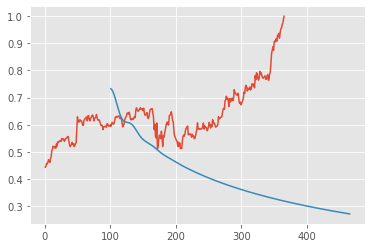

In [221]:
plt.plot(day_new,scaler.inverse_transform(df2[2346:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

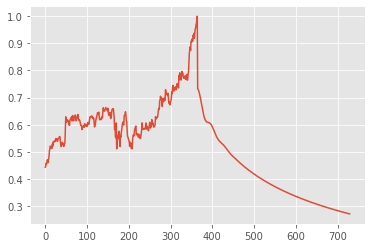

In [223]:
df3=df2.tolist()
df3.extend(lst_output)
plt.plot(df3[2346:])